In [1]:
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('Tiff Names and Voltage Trace Sync 133015325001722964 - trimmed.log', delimiter='\t', header=0)

,Filename,Time,CH D - V,CH D - I(μA),CH D - R(Ω)
0,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
1,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
2,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
3,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
4,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
...,...,...,...,...,...
915,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0
916,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0
917,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0
918,C:\Users\cbio_prototype\Desktop\220507\900\088...,2022-07-05 15:08:19.750,0.0,0.0,0.0


In [3]:
f = open('Tiff Names and Voltage Trace Sync 133015325001722964.log')

In [4]:
# User input
logfile = 'Tiff Names and Voltage Trace Sync 133015325001722964.log'

# User options (and defaults)
postfix = 'trimmed'
columns = ['filename', 'timestamp', 'V', 'I', 'R']

# Logfile pre-processing (to fix malformed text/log files from David's software)
infile = Path(logfile)
ext = infile.suffix
outfile = f'{infile.stem} - {postfix}.log'
print('Selected log file:')
print(f'\t{infile}')
print('Output log file:')
print(f'\t{outfile}')

f_out = open(outfile, 'w')

with open(outfile, 'w') as f_out:
    with open(infile, 'r') as f:
        for i, line in enumerate(f.readlines()):
            f_out.write(line.rstrip() + '\n')


# Use pandas to read in *fixed* logfile and manipulate data
df = pd.read_csv(outfile, delimiter='\t', header=0, names=columns)
df.I *= 1.0e-6  # Default to Amperes (from uA) for current

Selected log file:
	Tiff Names and Voltage Trace Sync 133015325001722964.log
Output log file:
	Tiff Names and Voltage Trace Sync 133015325001722964 - trimmed.log


In [5]:
df = pd.read_csv(outfile, delimiter='\t', header=0, names=columns)

In [6]:
def get_delta_seconds(si, s0):
    """Compute time difference in seconds between Series
        element si and reference s0
    """
    return (si - s0).total_seconds()

def to_timedelta(s):
    import ciso8601
    s_out = s.map(ciso8601.parse_datetime)
    tds = lambda si: get_delta_seconds(si, s_out.iloc[0])
    return s_out.map(tds)

In [7]:
def split_timestamp_column(df, timestamp_column='timestamp', time_column='t'):
    import ciso8601
    df_out = df.copy(deep=True)
    s = df[timestamp_column]
    s = s.map(ciso8601.parse_datetime)
    print(s.dtype)
    df_out[timestamp_column] = s

    tds = lambda si: get_delta_seconds(si, s0=s.iloc[0])
    df_out[time_column] = s.map(tds)
    return df_out

In [8]:
split_timestamp_column(df)

datetime64[ns]


,filename,timestamp,V,I,R,t
0,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0,0.000
1,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0,0.000
2,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0,0.000
3,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0,0.000
4,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...
915,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0,18.944
916,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0,18.944
917,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0,18.944
918,C:\Users\cbio_prototype\Desktop\220507\900\088...,2022-07-05 15:08:19.750,0.0,0.0,0.0,18.944


---

In [9]:
df

,filename,timestamp,V,I,R
0,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
1,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
2,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
3,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
4,C:\Users\cbio_prototype\Desktop\220507\900\000...,2022-07-05 15:08:00.806,0.0,0.0,0.0
...,...,...,...,...,...
915,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0
916,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0
917,C:\Users\cbio_prototype\Desktop\220507\900\087...,2022-07-05 15:08:19.750,0.0,0.0,0.0
918,C:\Users\cbio_prototype\Desktop\220507\900\088...,2022-07-05 15:08:19.750,0.0,0.0,0.0


---

---

In [27]:
from PIL import Image
import skimage as ski
from scipy.ndimage import gaussian_filter

In [12]:
# Important: plt.imshow will display image with brightness rescaled
#   to min/max values of the inputted array arr.
def imshow(arr, cmap='Greys', vmin=0, vmax=None, vsize=7, bitsize=12):
    bitsize = arr.dtype.itemsize * 8 if not bitsize else bitsize
    vmax = 2**bitsize - 1 if vmax is None else vmax
    py, px = arr.shape
    aspect_ratio = px/py
    fig, ax = plt.subplots(figsize=(vsize*aspect_ratio, vsize))
    ax.imshow(arr, cmap=cmap, vmin=vmin, vmax=vmax)

In [13]:
datadir = 'data'
rundir = '800'
iname = f'{datadir}/{rundir}/*.tif'
ipath = Path(iname)

stack = ski.io.imread_collection(str(ipath), plugin='tifffile')

In [14]:
len(stack)

133

In [15]:
frame0 = stack[0]

In [16]:
(frame0).dtype

dtype('uint16')

In [17]:
s, e = 50, 101
small_stack = ski.io.concatenate_images(stack[s:e])[:,::-1,:]  # Flip all images in vertical dimension

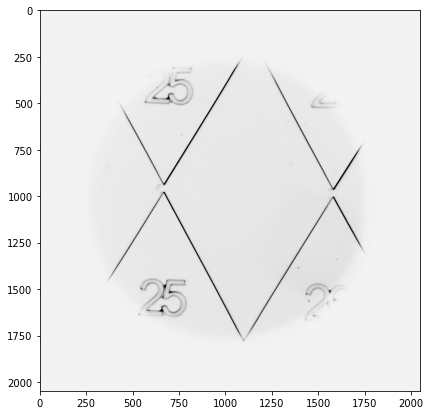

In [18]:
imshow(small_stack[0,:,:], bitsize=12)

In [19]:
bg = np.mean(small_stack, axis=0).astype('uint16')
bg

array([[405, 400, 397, ..., 394, 391, 391],
       [395, 394, 396, ..., 391, 394, 390],
       [397, 396, 394, ..., 391, 393, 397],
       ...,
       [403, 399, 398, ..., 408, 409, 406],
       [377, 378, 381, ..., 405, 406, 411],
       [403, 399, 398, ..., 402, 400, 400]], dtype=uint16)

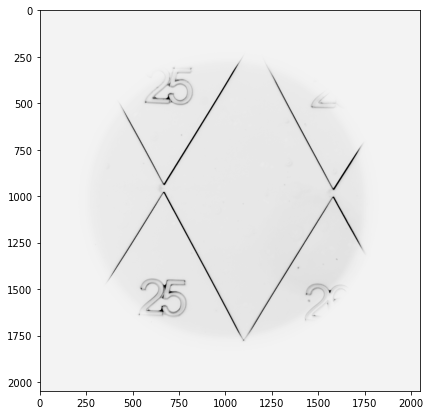

In [22]:
imshow(bg, bitsize=12)

In [20]:
frame50 = small_stack[50,:,:]

**Note:** Zero-out would-be negative pixel values to avoid issues with using unsigned integers
_before_ subtracting directly.

In [21]:
threshold = 25
mask = (frame50 < bg)

frame50_minus_bg = np.where(mask, 0, frame50 - bg)  # Zero-out would-be negative pixel values
frame50_minus_bg = np.where(frame50_minus_bg < threshold, 0, frame50_minus_bg)

### No smoothing (at all)

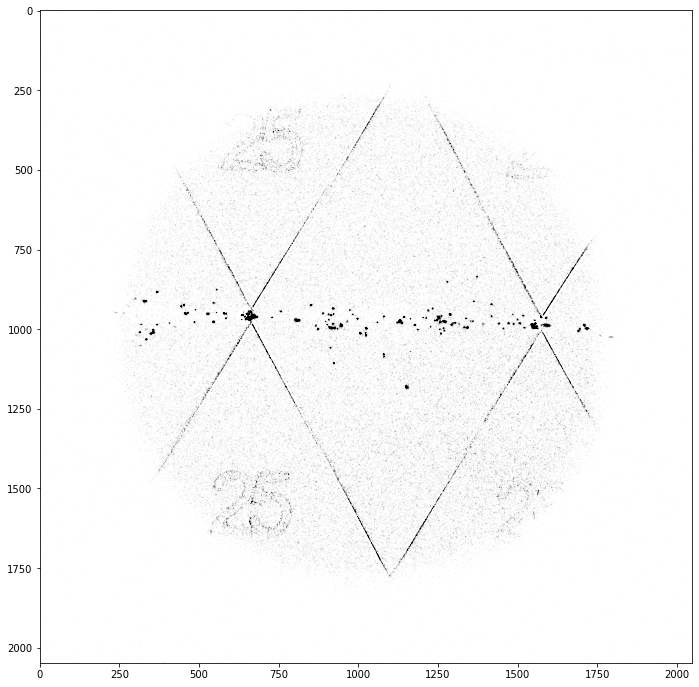

In [23]:
imshow(10*frame50_minus_bg, cmap='Greys', vmin=0, vmax=frame50_minus_bg.max(), vsize=12)

### (Gaussian) Smoothing (in space) _after_ subtraction/thresholding

In [28]:
frame50_minus_bg_smoothed = gaussian_filter(10*frame50_minus_bg, sigma=5)

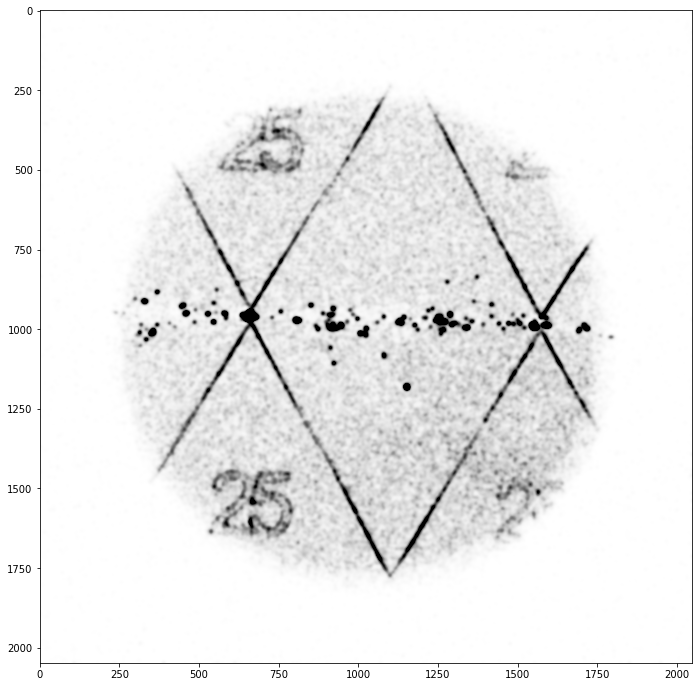

In [29]:
imshow(10*frame50_minus_bg_smoothed, cmap='Greys', vmin=0, vmax=(frame50_minus_bg_smoothed).max(),
       vsize=12)

### (Gaussian) Smoothing (in space) _before_ subtraction/thresholding

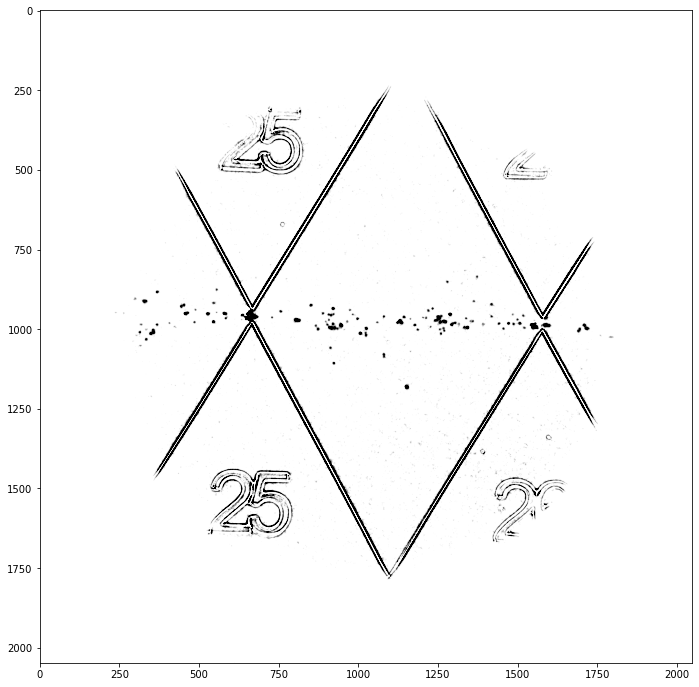

In [30]:
threshold = 25
frame50_smoothed = gaussian_filter(frame50, sigma=2)
mask = (frame50_smoothed < bg)

frame50_minus_bg_smoothed = np.where(mask, 0, frame50_smoothed - bg)
frame50_minus_bg_smoothed = np.where(frame50_minus_bg_smoothed < threshold, 0,
                                    frame50_minus_bg_smoothed)

imshow(10*frame50_minus_bg_smoothed, cmap='Greys', vmin=0, vmax=frame50_minus_bg_smoothed.max(),
       vsize=12)

In [31]:
rng = np.random.default_rng(seed=42)
rng.random((1024,1024))

array([[0.77395605, 0.43887844, 0.85859792, ..., 0.74961862, 0.99180772,
        0.53141381],
       [0.65999572, 0.30248028, 0.9475356 , ..., 0.04234611, 0.44493776,
        0.54698779],
       [0.14674323, 0.33628583, 0.98764745, ..., 0.44845826, 0.01625711,
        0.9640137 ],
       ...,
       [0.92772991, 0.34153472, 0.36933339, ..., 0.56861244, 0.95226876,
        0.13776105],
       [0.63905403, 0.27267967, 0.90863672, ..., 0.74816708, 0.71079364,
        0.36400357],
       [0.72924955, 0.66195863, 0.9503273 , ..., 0.54231353, 0.62105385,
        0.34106264]])

In [34]:
np.mean(myimg)

2047.4692133179976

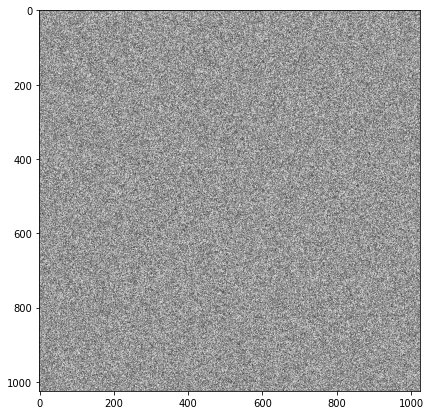

In [33]:
myimg = 4096*rng.random((1024,1024))
imshow(myimg)

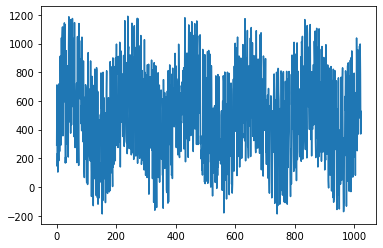

In [35]:
x = np.arange(0, 1024)

img1d = 1024*rng.random(1024) + 200*np.sin(2*np.pi*x/200)
plt.plot(img1d)

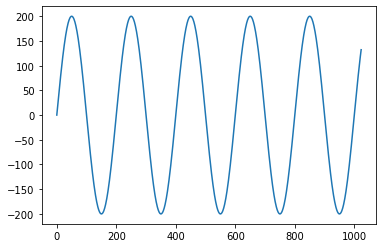

In [36]:
plt.plot(200*np.sin(2*np.pi*x/200))

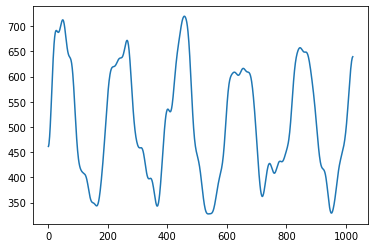

In [44]:
plt.plot(gaussian_filter(img1d, sigma=10))

In [38]:
myimg_smoothed = gaussian_filter(myimg, sigma=5)

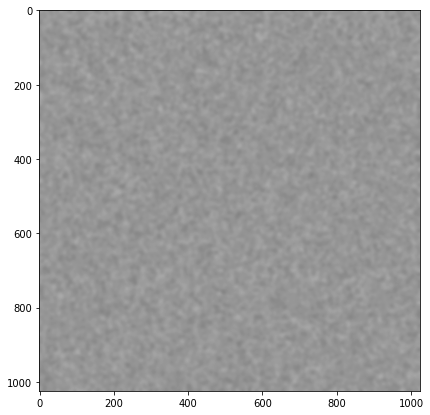

In [39]:
imshow(myimg_smoothed)

In [40]:
np.mean(myimg_smoothed)

2047.4692133179979

In [41]:
small_stack[0,:,:] - bg

array([[65527,     2,     9, ..., 65518, 65523, 65523],
       [65535,     0,     1, ..., 65532,     2, 65522],
       [    2,     1,     1, ...,     6,    14,    19],
       ...,
       [    3,     5,     3, ...,     0,     8,     6],
       [    0,     1,    11, ..., 65533,    14,    10],
       [    3,     5,     3, ..., 65534,    18,    18]], dtype=uint16)

---
## Perform "smart" post-processing on _stack_ of images

Here, "smart" means that we'll do Gaussian spatial smoothing before background subtraction

In [47]:
from PIL import Image
import skimage as ski
from scipy.ndimage import gaussian_filter

In [49]:
datadir = 'data'
rundir = '800'
iname = f'{datadir}/{rundir}/*.tif'
ipath = Path(iname)

stack = ski.io.imread_collection(str(ipath), plugin='tifffile')

In [87]:
np.sum(np.array(stack)[3:6,:,:] * np.array([1,2,3])[:,np.newaxis,np.newaxis], axis=0).shape

(2048, 2048)

In [93]:
x = np.array(stack)[3:6,:,:].T
w = np.array([1,2,3])

In [97]:
np.hamming(10)

array([0.08      , 0.18761956, 0.46012184, 0.77      , 0.97225861,
       0.97225861, 0.77      , 0.46012184, 0.18761956, 0.08      ])

In [110]:
np.hamming(100).sum()

53.54

In [108]:
import scipy as sp
from scipy import signal as sps

In [111]:
sps.windows.hamming(100).sum()

53.54

In [95]:
x*w

array([[[ 440,  782, 1233],
        [ 385,  732, 1098],
        [ 440,  782, 1233],
        ...,
        [ 388,  806, 1215],
        [ 394,  796, 1200],
        [ 419,  808, 1227]],

       [[ 442,  764, 1224],
        [ 393,  756, 1137],
        [ 442,  764, 1224],
        ...,
        [ 391,  798, 1212],
        [ 383,  784, 1206],
        [ 392,  782, 1221]],

       [[ 405,  770, 1176],
        [ 401,  754, 1152],
        [ 405,  770, 1176],
        ...,
        [ 390,  798, 1197],
        [ 374,  794, 1197],
        [ 372,  790, 1188]],

       ...,

       [[ 425,  758, 1188],
        [ 419,  796, 1188],
        [ 404,  822, 1182],
        ...,
        [ 378,  776, 1158],
        [ 379,  774, 1176],
        [ 379,  782, 1206]],

       [[ 414,  778, 1191],
        [ 418,  806, 1197],
        [ 404,  834, 1200],
        ...,
        [ 380,  784, 1185],
        [ 388,  784, 1164],
        [ 397,  772, 1164]],

       [[ 414,  778, 1191],
        [ 421,  834, 1200],
        [ 387,  

In [88]:
np.sum(np.array([1,2,3])*np.array(stack)[3:6,:,:], axis=0).shape

ValueError: operands could not be broadcast together with shapes (3,) (3,2048,2048) 

In [63]:
arr = np.zeros(len(stack), dtype=np.uint32)

In [65]:
for i, frame in enumerate(stack):
    frame

In [71]:
arr

array([570, 570, 569, 569, 570, 570, 569, 569, 570, 570, 570, 570, 569,
       569, 570, 570, 570, 570, 570, 570, 569, 570, 570, 570, 569, 570,
       570, 570, 570, 570, 570, 571, 571, 570, 570, 570, 570, 570, 570,
       570, 570, 570, 570, 570, 571, 570, 570, 570, 570, 570, 570, 570,
       570, 570, 570, 570, 570, 571, 570, 570, 571, 570, 570, 571, 570,
       571, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 570, 571,
       571, 570, 571, 570, 570, 570, 571, 571, 571, 571, 571, 571, 571,
       571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 572,
       572, 571, 571, 571, 572, 572, 571, 572, 572, 572, 572, 572, 570,
       571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571,
       571, 571, 571], dtype=uint32)

---

---